In [36]:

import pandas as pd
import numpy as np
import jieba
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from time import time
from tpot import TPOTClassifier

In [2]:
fname="/Users/shash/Desktop/wikinews/assignments/project1/peopledaily_news.csv"

In [3]:
df=pd.read_csv(fname, encoding='gb18030')

In [4]:
df.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
xinhua_news=df[df['source']=='新华社']

In [6]:
len(xinhua_news)/len(df)

0.8778051801676133

In [7]:
##Step2: 数据预处理
df['y'] = df.apply(lambda x: 1 if x['source'] == '新华社' else 0, axis=1)

In [8]:
def clean_text(s):
    
    return ' '.join(jieba.cut(re.sub('[\r\n\u3000]', '', s).replace('\\n','')))


In [9]:
# 使用tfidf进行文本向量化
#去掉值为零的列

content_dropna = df.dropna(subset=['source', 'content'])

In [10]:
len(content_dropna)

87052

In [12]:
type(content_dropna)

pandas.core.frame.DataFrame

In [13]:
text_list=content_dropna['content'].to_list()

In [14]:
corpus=[]
for text in text_list:
    corpus.append(clean_text(text))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\shash\AppData\Local\Temp\jieba.cache
Loading model cost 0.723 seconds.
Prefix dict has been built succesfully.


In [15]:
len(corpus)

87052

In [16]:
corpus[:2]

['此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型 外 ， 其余 机型 已 暂停 更新 发布 （ 含 开发 版 / 体验版 内测 ， 稳定版 暂不受 影响 ） ， 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 。 有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中 。 MIUI   8 去年 5 月 发布 ， 距今已有 一年 有余 ， 也 是 时候 更新换代 了 。 当然 ， 关于 MIUI   9 的 确切 信息 ， 我们 还是 等待 官方消息 。',
 '骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器 ， 高通 强调 ， 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 。 相反 ， 他们 正 联手 微软 ， 找到 一种 适合 桌面 平台 的 、 兼顾 性能 和 功耗 的 完美 方案 。 报道 称 ， 微软 已经 拿到 了 一些 新 的 源码 ， 以便 Windows   10 更好 地 理解 big . little 架构 。 资料 显示 ， 骁龙 835 作为 一款 集成 了 CPU 、 GPU 、 基带 、 蓝牙 / Wi - Fi 的 SoC ， 比 传统 的 Wintel 方案 可以 节省 至少 30% 的 PCB 空间 。 按计划 ， 今年 Q4 ， 华硕 、 惠普 、 联想 将 首发 骁龙 835   Win10 电脑 ， 预计 均 是 二合一 形态 的 产品 。 当然 ， 高通 骁龙 只是 个 开始 ， 未来 也许 还 能 见到 三星 Exynos 、 联发科 、 华为 麒麟 、 小米 澎湃 等 进入 Windows   10 桌面 平台 。']

In [18]:
vectorize=TfidfVectorizer(max_features=200)
X=vectorize.fit_transform(corpus)
X.shape

(87052, 200)

In [19]:
### 训练KNN模型
y=content_dropna['y'].to_list()
len(y)

87052

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=22)

In [26]:
X_train.size, X_test.size

(1218715, 304627)

In [30]:
#tpot = TPOTClassifier(generations=6,verbosity=2,config_dict='TPOT sparse')
#tpot.fit(X_train, y_train)
#tpot.score(X_test, y_test)
#tpot.export('pipeline.py')



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(input_matrix, C=0.5, dual=False, loss=squared_hinge, penalty=l1, tol=0.1)


AttributeError: 'list' object has no attribute 'astype'

In [34]:
K = [1, 2, 3, 5, 7, 10]
train_acc = []
train_precision = []
train_recall = []
train_f1 = []
test_acc = []
test_precision = []
test_recall = []
test_f1 = []

for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(X_train, y_train)
    train_pred = neigh.predict(X_train)
    test_pred = neigh.predict(X_test)
    # acc
    t1 = neigh.score(X_train, y_train)
    t3 = neigh.score(X_test, y_test)
    train_acc.append(t1)
    test_acc.append(t3)
    
    # precision and recall
    p, r, t = precision_recall_curve(y_train, neigh.predict(X_train))
    train_precision.append(p[1])
    train_recall.append(r[1])
    train_f1.append(p[1] * r[1] / (p[1] + r[1]))

    
    p, r, t = precision_recall_curve(y_test, neigh.predict(X_test))
    test_precision.append(p[1])
    test_recall.append(r[1])
    test_f1.append(p[1] * r[1] / (p[1] + r[1]))
    
    print(k, ' Neighbour-Model accuracy on training, validation and test dataset is: ', round(t1, 2), round(t3, 2))

1  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93
2  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93
3  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93
5  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93
7  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93
10  Neighbour-Model accuracy on training, validation and test dataset is:  1.0 0.93


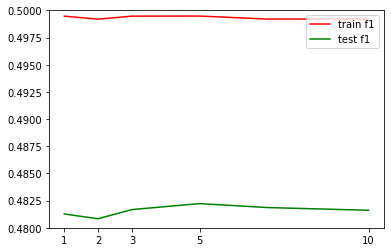

In [37]:
plt.plot(K, train_f1, color='r', label='train f1')
plt.plot(K, test_f1, color='g', label='test f1')
plt.legend(loc='upper right')
plt.ylim(0.48, 0.5)
plt.xticks([1, 2, 3, 5, 10])
plt.show()

In [ ]:
#根据上图呈现的趋势，我们选取领域大小k=3，weights=distance

In [38]:
five_neigh=KNeighborsClassifier(n_neighbors=5, weights='distance')
five_neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [41]:
y_pred=five_neigh.predict(X_test)
#y_pred.shape, y.shape

In [43]:
potential_copy_num = [no for no, y in enumerate(y_test) if y == 0 and y_pred[no] == 1]
len(potential_copy_num)

829

In [45]:
potential_copy_num[:10]

[0, 5, 13, 14, 17, 20, 38, 108, 114, 127]

In [ ]:
### 参考：https://github.com/xuziq1997/2019Summer_NLP/blob/master/assignment-07%2C08%2BFirst%2BStep%2Bof%2Busing%2Bmachine%2Blearning%2Band%2Bmodels..ipynb

In [ ]:
#tpot = TPOTClassifier(generations=6,verbosity=2,config_dict='TPOT sparse')
#tpot.fit(X_train, y_train)
#tpot.score(X_test, y_test)
#tpot.export('pipeline.py')
##可自动对比不同的分类器，然而运行时间太长